<a href="https://colab.research.google.com/github/atiawei/atiawei.github.io/blob/master/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Prediksi Pelanggan yang berhenti berlangganan layanan**

Dalam contoh kasus ini, akan dibuat model churn prediction untuk sebuah perusahaan telekomunikasi yang menjual layanan internet nirkabel dengan kartu prabayar. Tidak sedikit pelanggan perusahaan ini yang telah berpindah langganan ke perusahaan pesaing akibat tawaran harga dan layanan yang lebih menarik. Pihak manajemen perusahaan ini menyadari terkait masalah tersebut dan berencana meluncurkan program-program promosi untuk menahan churn rate. Program promosi ini hanya akan ditawarkan melalui SMS kepada kelompokl pelanggan yang dianggap rawan churn. Agar lebih efektif, machine learning diperlukan untuk menentukan kelompok pelanggan tsb.

In [ ]:
#Input Data
import pandas as pd
df1=pd.read_csv('churnprediction_ch9.csv', sep=',', index_col=['customer_id'])
df1.head(10)
df1.info()

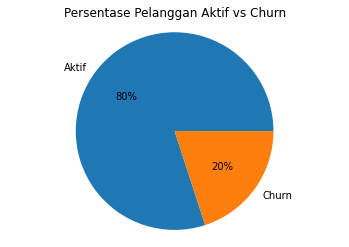

In [ ]:
dfAktifChurn = df1.groupby('churn').count()
import matplotlib.pyplot as plt
plt.pie(dfAktifChurn['product'],labels=['Aktif', 'Churn'], autopct='%1.0f%%')
plt.title('Persentase Pelanggan Aktif vs Churn')
plt.axis('equal')
plt.show()

In [ ]:
df1['product'].value_counts()
pd.get_dummies(df1['product'])

In [ ]:
df2 = pd.concat([df1, pd.get_dummies(df1['product'])], axis=1, sort=False)
df2.drop(['product'], axis=1, inplace=True)
dfKorelasi = df2.corr()

In [ ]:
#Feature Selection
import seaborn as sns
dfKorelasi = df2.corr()
sns.heatmap(dfKorelasi, xticklabels=dfKorelasi.columns.values, yticklabels=dfKorelasi.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(10,10)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
X = df2.drop(['reload_2', 'socmed_2', 'games', 'churn'], axis=1, inplace=False)
y = df2['churn']

In [ ]:
import sklearn.model_selection as ms
X_train,X_test,y_train,y_test=ms.train_test_split(X,y,test_size=0.8,random_state=0)

In [ ]:
import sklearn.preprocessing as pp
scl = pp.StandardScaler(copy=True, with_mean=True, with_std=True)
scl.fit(X_train)
X_train = scl.transform(X_train)
X_test = scl.transform(X_test)

In [ ]:
#Melatih Model (Reglog)
import sklearn.model_selection as ms
import sklearn.linear_model as lm
import sklearn.metrics as met
model = lm.LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_prediksi = model.predict(X_test)
print(y_prediksi)
score = met.accuracy_score(y_test, y_prediksi)
print("accuracy=", score)
precision = met.precision_score(y_test, y_prediksi)
print("precision=", precision)
recall = met.recall_score(y_test, y_prediksi)
print("recall=", recall)
auc = met.roc_auc_score(y_test, y_prediksi)
print("AUC=", auc)

[1 0 0 ... 0 0 0]
accuracy= 0.82975
precision= 0.6256627783669141
recall= 0.3689806128830519
AUC= 0.6569164898503683


In [ ]:
#Melatih model (RandomForest)
import sklearn.ensemble as ens
import sklearn.metrics as met
model = ens.RandomForestClassifier(n_estimators=200, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [ ]:
y_prediksi = model.predict(X_test)
print(y_prediksi)
score = met.accuracy_score(y_test, y_prediksi)
print("accuracy=", score)
precision = met.precision_score(y_test, y_prediksi)
print("precision=", precision)
recall = met.recall_score(y_test, y_prediksi)
print("recall=", recall)
auc = met.roc_auc_score(y_test, y_prediksi)
print("AUC=", auc)

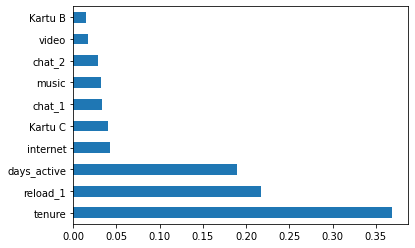

In [ ]:
important_feature = pd.Series(model.feature_importances_, index=X.columns)
important_feature.nlargest(10).plot(kind='barh')

Kesimpulan :

Tiga faktor penentu terpenting terhadap kemungkinan apakah seorang pelanggan akan berhenti berlangganan adalah tenure (lamanya pelanggan menjadi pelanggan), reload (jumlah isi ulang pulsa), dan days active (jumlah hari aktif menggunakan layanan).

Kartu B dan kartu C adalah dua produk yang berpengaruh terhadap churn score. Artinya pelanggan produk kartu A lebih setia dan tidak perlu terlalu dikhawatirkan akan berhenti berlangganan dalam waktu dekat.

Berdasarkan model prediksi yang sudah dibuat, hendaknya pihak departemen marketing perusahaan ini dapat membidik pelanggan yang masuk dalam kriteria di atas agar mereka dapat menjadi target program promosi, untuk mencegah mereka berhenti berlangganan.

